### Problem Statement: Predicting Procurement Spend Efficiency and Anomalies
##### Objective:
 - Develop a machine learning model to predict whether a purchase order is efficient or exhibits anomalies based on historical procurement data. The goal is to help the procurement team identify areas for cost savings, improve strategic planning, and enhance overall procurement efficiency.
##### Target Variable:
- Efficiency_Label: A binary variable indicating whether a purchase order is efficient (0) or exhibits anomalies (1). This needs to be defined based on specific criteria such as cost overruns, delays, and deviations from expected spending patterns.

### Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading The Dataset

In [2]:
df=pd.read_csv('Spend Analytics.xlsx - Data.csv')
df.head()


C:\Users\Kavin\AppData\Local\Temp\ipykernel_32736\62637300.py:1: DtypeWarning: Columns (6,8,9,23,24,33,37,38,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Spend Analytics.xlsx - Data.csv')


,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,SLoc,TrackingNo,Matl Group,...,Section,Indenter ID,Input Tax Credit,Item.2,Spend_Class,Purchase_doc,No. of Requester,Class of Requester,No. of purchase_doc,Class of Purchase_doc
0,7600174848,10,1/1/2019,IB Ross Broiler Finisher Feed,7101329.0,7860,PS09,F007,NaN,1500,...,0,0,NaN,0,Major Spend,Available,1,Single Requester,7864,More than 12
1,7600174849,10,1/1/2019,IB Ross Broiler Finisher Feed,7101329.0,7860,PS09,F002,NaN,1500,...,0,0,NaN,0,Major Spend,Available,1,Single Requester,7864,More than 12
2,7600174850,10,1/1/2019,IB Ross Broiler Finisher Feed,7101329.0,7860,PS09,F010,NaN,1500,...,0,0,NaN,0,Major Spend,Available,1,Single Requester,7864,More than 12
3,7600174851,10,1/1/2019,IB Ross Broiler Pre-Starter Feed,7101327.0,7860,PS08,T001,NaN,1500,...,0,0,NaN,0,Major Spend,Available,1,Single Requester,5280,More than 12
4,7600174851,20,1/1/2019,IB Ross Broiler Starter Feed,7101328.0,7860,PS08,T001,NaN,1500,...,0,0,NaN,0,Major Spend,Available,1,Single Requester,6965,More than 12


In [3]:
df.shape

(75349, 71)

In [4]:
df.columns

Index(['Purch.Doc.', 'Item', 'Changed On', 'Short Text', 'Material', 'CoCd',
       'Plnt', 'SLoc', 'TrackingNo', 'Matl Group', 'PO Quantity', 'OUn', 'OPU',
       'Conv.', 'Eq. To', 'Net Price', 'Per', 'Net Value', 'Gross value',
       'GRT', 'Overdel. Tol.', 'Underdel.Tol.', 'DCI', 'A', 'Cns', 'Item.1',
       'Agr. Cum. Qty', 'TOZ', 'BUn', 'Non-deductible', 'Quantity',
       'Price Date', 'Cat', 'Effective value', 'PTm', 'Net Weight', 'Un', 'S',
       'Profit Ctr', 'Gross Weight', 'Volume', 'Net value', 'S.1',
       'Object no.', 'Time of Transmission', 'Next Transmission Number', 'Itm',
       'RShLi', 'MTyp', 'NCM Code', 'Spec. Stk Valuation', 'Reb.basis',
       'Requested By', 'Itm.1', 'Requirement Urgency', 'CRM  Item No',
       'Down Payment Amount', 'Priority (Material Required Within)',
       'Ordered By', 'Approved By', 'Priority', 'Section', 'Indenter ID',
       'Input Tax Credit', 'Item.2', 'Spend_Class', 'Purchase_doc',
       'No. of Requester', 'Class of Request

In [5]:
df.describe()

,Purch.Doc.,Item,Material,CoCd,Conv.,Eq. To,GRT,Overdel. Tol.,Underdel.Tol.,Item.1,...,Requirement Urgency,CRM Item No,Down Payment Amount,Priority (Material Required Within),Ordered By,Approved By,Indenter ID,Item.2,No. of Requester,No. of purchase_doc
count,7.534900e+04,75349.000000,7.375100e+04,75349.000000,75349.0,75349.000000,75349.0,75349.000000,75349.000000,75349.00000,...,75349.0,75349.0,75349.0,75349.000000,75349.000000,75349.000000,75349.000000,75349.0,75349.000000,75349.000000
mean,8.321515e+09,18.202113,3.290407e+06,8459.239273,1.0,0.978792,0.0,0.309201,0.037784,0.63892,...,0.0,0.0,0.0,1.866714,10325.306414,10588.474207,10934.932448,0.0,0.999987,3416.026384
std,1.446280e+09,19.902048,3.032629e+06,750.644037,0.0,0.144078,0.0,1.986858,0.613173,5.32397,...,0.0,0.0,0.0,6.566736,21424.931238,21610.741106,21895.297045,0.0,0.003643,2839.205471
min,1.000004e+09,1.000000,8.000020e+05,4500.000000,1.0,0.000000,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,7.600181e+09,10.000000,9.104220e+05,7860.000000,1.0,1.000000,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,101.000000
50%,9.100306e+09,10.000000,9.500280e+05,9000.000000,1.0,1.000000,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2770.000000
75%,9.200095e+09,20.000000,7.101328e+06,9000.000000,1.0,1.000000,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,6013.000000
max,9.900000e+09,410.000000,8.800002e+06,9000.000000,1.0,1.000000,0.0,40.000000,30.000000,200.00000,...,0.0,0.0,0.0,90.000000,54917.000000,54917.000000,54915.000000,0.0,1.000000,7864.000000


### EDA

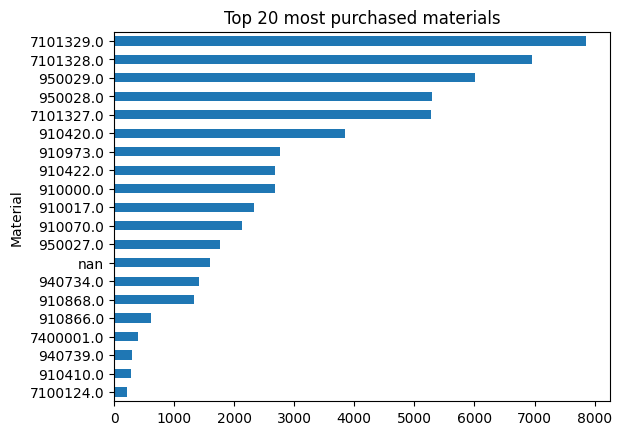

In [6]:
df['Material'].apply(lambda x:str(x)).value_counts()[:20].sort_values().plot(kind='barh',)
plt.title('Top 20 most purchased materials')
plt.show()

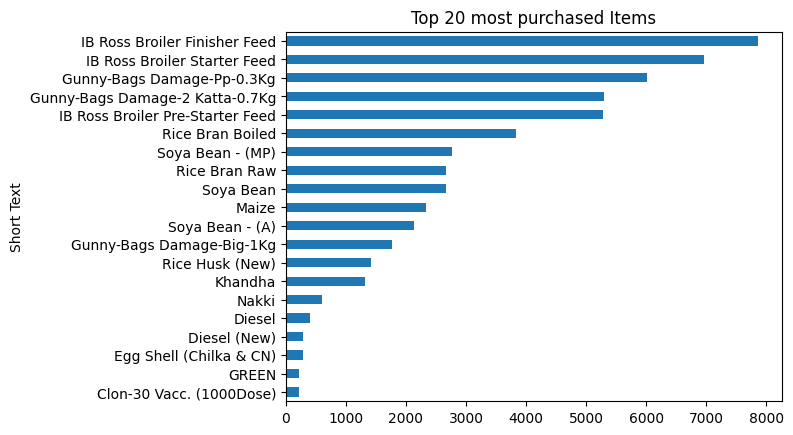

In [7]:
df['Short Text'].value_counts()[:20].sort_values().plot(kind='barh',)
plt.title('Top 20 most purchased Items')
plt.show()

In [8]:
len(df['Short Text'].unique())

7332

In [9]:
len(df['Short Text'].apply(lambda x:x.lower()).unique())

7310

In [10]:
df['Short Text']=df['Short Text'].apply(lambda x:x.lower())

### Checking the datatype,null_count,unique_values and percent_of_null_values in every column

In [11]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()}).iloc[:25,:]

,dtypes,null_count,unique_values,percent_of_null_values
Purch.Doc.,int64,0,42596,0.000000
Item,int64,0,42,0.000000
Changed On,object,0,210,0.000000
Short Text,object,0,7310,0.000000
Material,float64,1598,6325,0.021208
CoCd,int64,0,5,0.000000
Plnt,object,0,156,0.000000
SLoc,object,12833,1108,0.170314
TrackingNo,object,70422,162,0.934611
Matl Group,object,0,179,0.000000


In [12]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()}).iloc[25:51,:]

,dtypes,null_count,unique_values,percent_of_null_values
Item.1,int64,0,20,0.000000
Agr. Cum. Qty,int64,0,1,0.000000
TOZ,int64,0,1,0.000000
BUn,object,1598,27,0.021208
Non-deductible,object,0,3455,0.000000
Quantity,int64,0,1,0.000000
Price Date,object,281,233,0.003729
Cat,object,0,1,0.000000
Effective value,object,0,26,0.000000
PTm,int64,0,2,0.000000


In [13]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()}).iloc[51:,:]

,dtypes,null_count,unique_values,percent_of_null_values
Reb.basis,object,0,19382,0.000000
Requested By,object,69200,501,0.918393
Itm.1,int64,0,1,0.000000
Requirement Urgency,int64,0,1,0.000000
CRM Item No,int64,0,1,0.000000
Down Payment Amount,float64,0,1,0.000000
Priority (Material Required Within),int64,0,62,0.000000
Ordered By,int64,0,124,0.000000
Approved By,int64,0,64,0.000000
Priority,object,60698,9,0.805558


### Finding the number of columns having only a single label

In [14]:
# list of all the column names with single label
b=[]

b1=[]
for i in df.columns:
    if len(df[i].value_counts())==1:
        b.append(i)
        b1.append(df[i].unique()[0])

print(f'Total number of columns having only a single label as its entry: {len(b)}')
print('Tabulated below')
pd.DataFrame({'dtypes':df[b].dtypes,'null_count':df[b].isnull().sum(),
              'unique_values':df[b].nunique(),'label_value':b1,
             'percent_of_null_values':df[b].isnull().mean()})


Total number of columns having only a single label as its entry: 21
Tabulated below


,dtypes,null_count,unique_values,label_value,percent_of_null_values
Conv.,int64,0,1,1,0.000000
GRT,int64,0,1,0,0.000000
DCI,object,7750,1,X,0.102855
Agr. Cum. Qty,int64,0,1,0,0.000000
TOZ,int64,0,1,0,0.000000
Quantity,int64,0,1,0,0.000000
Cat,object,0,1,F,0.000000
S,object,73289,1,NaN,0.972661
Net value,float64,0,1,0.0,0.000000
S.1,object,74740,1,NaN,0.991918


In [15]:
df.drop(b, axis=1,inplace=True)

In [16]:
# columns having more than 70% missing values
f=['SLoc','TrackingNo','A','Cns','Un','Requested By']

In [17]:
df.drop(f, axis=1,inplace=True)

In [18]:
# filling the nan values as 0 in the 'Input Tax Credit' column
df.fillna({'Input Tax Credit':'0'},inplace=True)

### Checking the shape of the dataset after removing unwanted columns

In [19]:
df.shape

(75349, 44)

### Creating a function to remove comma,mismatched values and convert the datatype from 'string' to 'float'

In [20]:
def remove_comma_mismatched_values(column_name):  #mismatch eg. str(0.0) and str(0.00) when converted to float becomes 0.0
    q=list(df[column_name])
    print(df[column_name].value_counts(),'\n')
    q1=[]
    for p in q:
        s=str(p).strip()
        s1=s.replace(',','')
        try:
            q1.append(float(s1))
        except:
            q1.append(np.nan)
    df[column_name]=q1
    df[column_name]=df[column_name].astype(float)
    print('modified_values:')
    print(df[column_name].value_counts())
    print('..................................')
    print()

In [21]:
# list containing the column names which needs to be converted as the 'float' datatype
change_dt_float=['PO Quantity','Eq. To', 'Net Price', 'Per', 'Net Value', 'Gross value','Overdel. Tol.', 'Underdel.Tol.',
                 'Item.1','Effective value','PTm','Net Weight','Profit Ctr','Gross Weight', 'Volume','RShLi','Reb.basis',
                 'Priority (Material Required Within)','No. of Requester','No. of purchase_doc']

In [22]:
# Iterating and calling the function mentioned in the above list
for col_ in change_dt_float:
    remove_comma_mismatched_values(col_)

PO Quantity
1         3556
10,000    1899
5,000     1887
15,000    1319
2         1014
          ... 
1.815        1
32.937       1
5.538        1
3.669        1
4.715        1
Name: count, Length: 14990, dtype: int64 

modified_values:
PO Quantity
1.000        3556
10000.000    1899
5000.000     1887
15000.000    1319
2.000        1014
             ... 
1.815           1
32.937          1
5.538           1
3.669           1
4.715           1
Name: count, Length: 14990, dtype: int64
..................................

Eq. To
1    73751
0     1598
Name: count, dtype: int64 

modified_values:
Eq. To
1.0    73751
0.0     1598
Name: count, dtype: int64
..................................

Net Price
0.00         13425
20.00          461
30.94          454
29.59          423
30.00          418
             ...  
1,866.61         1
237.29           1
199.15           1
73.73            1
13,650.00        1
Name: count, Length: 8723, dtype: int64 

modified_values:
Net Price
0.00        13425
2

In [23]:
change_dt_str=['Purch.Doc.', 'Short Text', 'Material', 'CoCd','Plnt', 'Matl Group',  'OUn', 'OPU','Input Tax Credit',
              'BUn','Non-deductible','MTyp','NCM Code', 'Ordered By', 'Approved By', 'Section', 'Indenter ID',
                'Spend_Class','Class of Requester', 'Class of Purchase_doc']


#change_dt_date=['Changed On','Price Date']

In [24]:
df['Priority']=df['Priority'].apply(lambda x:str(x).lower())
df['Priority']=df['Priority'].map({'nan':'nan','mediam':'medium','medium':'medium',
                                   'high':'high','low':'low','very high':'very high'})

df.fillna({'Priority':'medium'},inplace=True)

df['Section']=df['Section'].apply(lambda x:str(x).lower())

for col in change_dt_str:
    df[col]=df[col].astype(str)

In [25]:
#Adjusting rare labels in 'Purch.Doc.' column
w=list(df['Purch.Doc.'])
w1=[]
for d in w:
    if w.count(d)<=3:
        w1.append('one_time_purchase')
    else:
        w1.append(d)
df['Purch.Doc.']=w1        

### Segregating categorical and numerical columns

In [26]:
#categorical columns list
all_cc=[]
#numerical columns list
all_nc=[]

for i in df.columns:
    if df[i].dtype=='O':
        all_cc.append(i)
    elif (df[i].dtype=='float') or (df[i].dtype=='int64'):
        all_nc.append(i)
    else:
        all_dc.append(i)
print('categorical_columns:',all_cc)
print()
print('numerical_columns:',all_nc)


categorical_columns: ['Purch.Doc.', 'Changed On', 'Short Text', 'Material', 'CoCd', 'Plnt', 'Matl Group', 'OUn', 'OPU', 'BUn', 'Non-deductible', 'Price Date', 'MTyp', 'NCM Code', 'Ordered By', 'Approved By', 'Priority', 'Section', 'Indenter ID', 'Input Tax Credit', 'Spend_Class', 'Class of Requester', 'Class of Purchase_doc']

numerical_columns: ['Item', 'PO Quantity', 'Eq. To', 'Net Price', 'Per', 'Net Value', 'Gross value', 'Overdel. Tol.', 'Underdel.Tol.', 'Item.1', 'Effective value', 'PTm', 'Net Weight', 'Profit Ctr', 'Gross Weight', 'Volume', 'RShLi', 'Reb.basis', 'Priority (Material Required Within)', 'No. of Requester', 'No. of purchase_doc']


### Checking the correlation between numerical columns

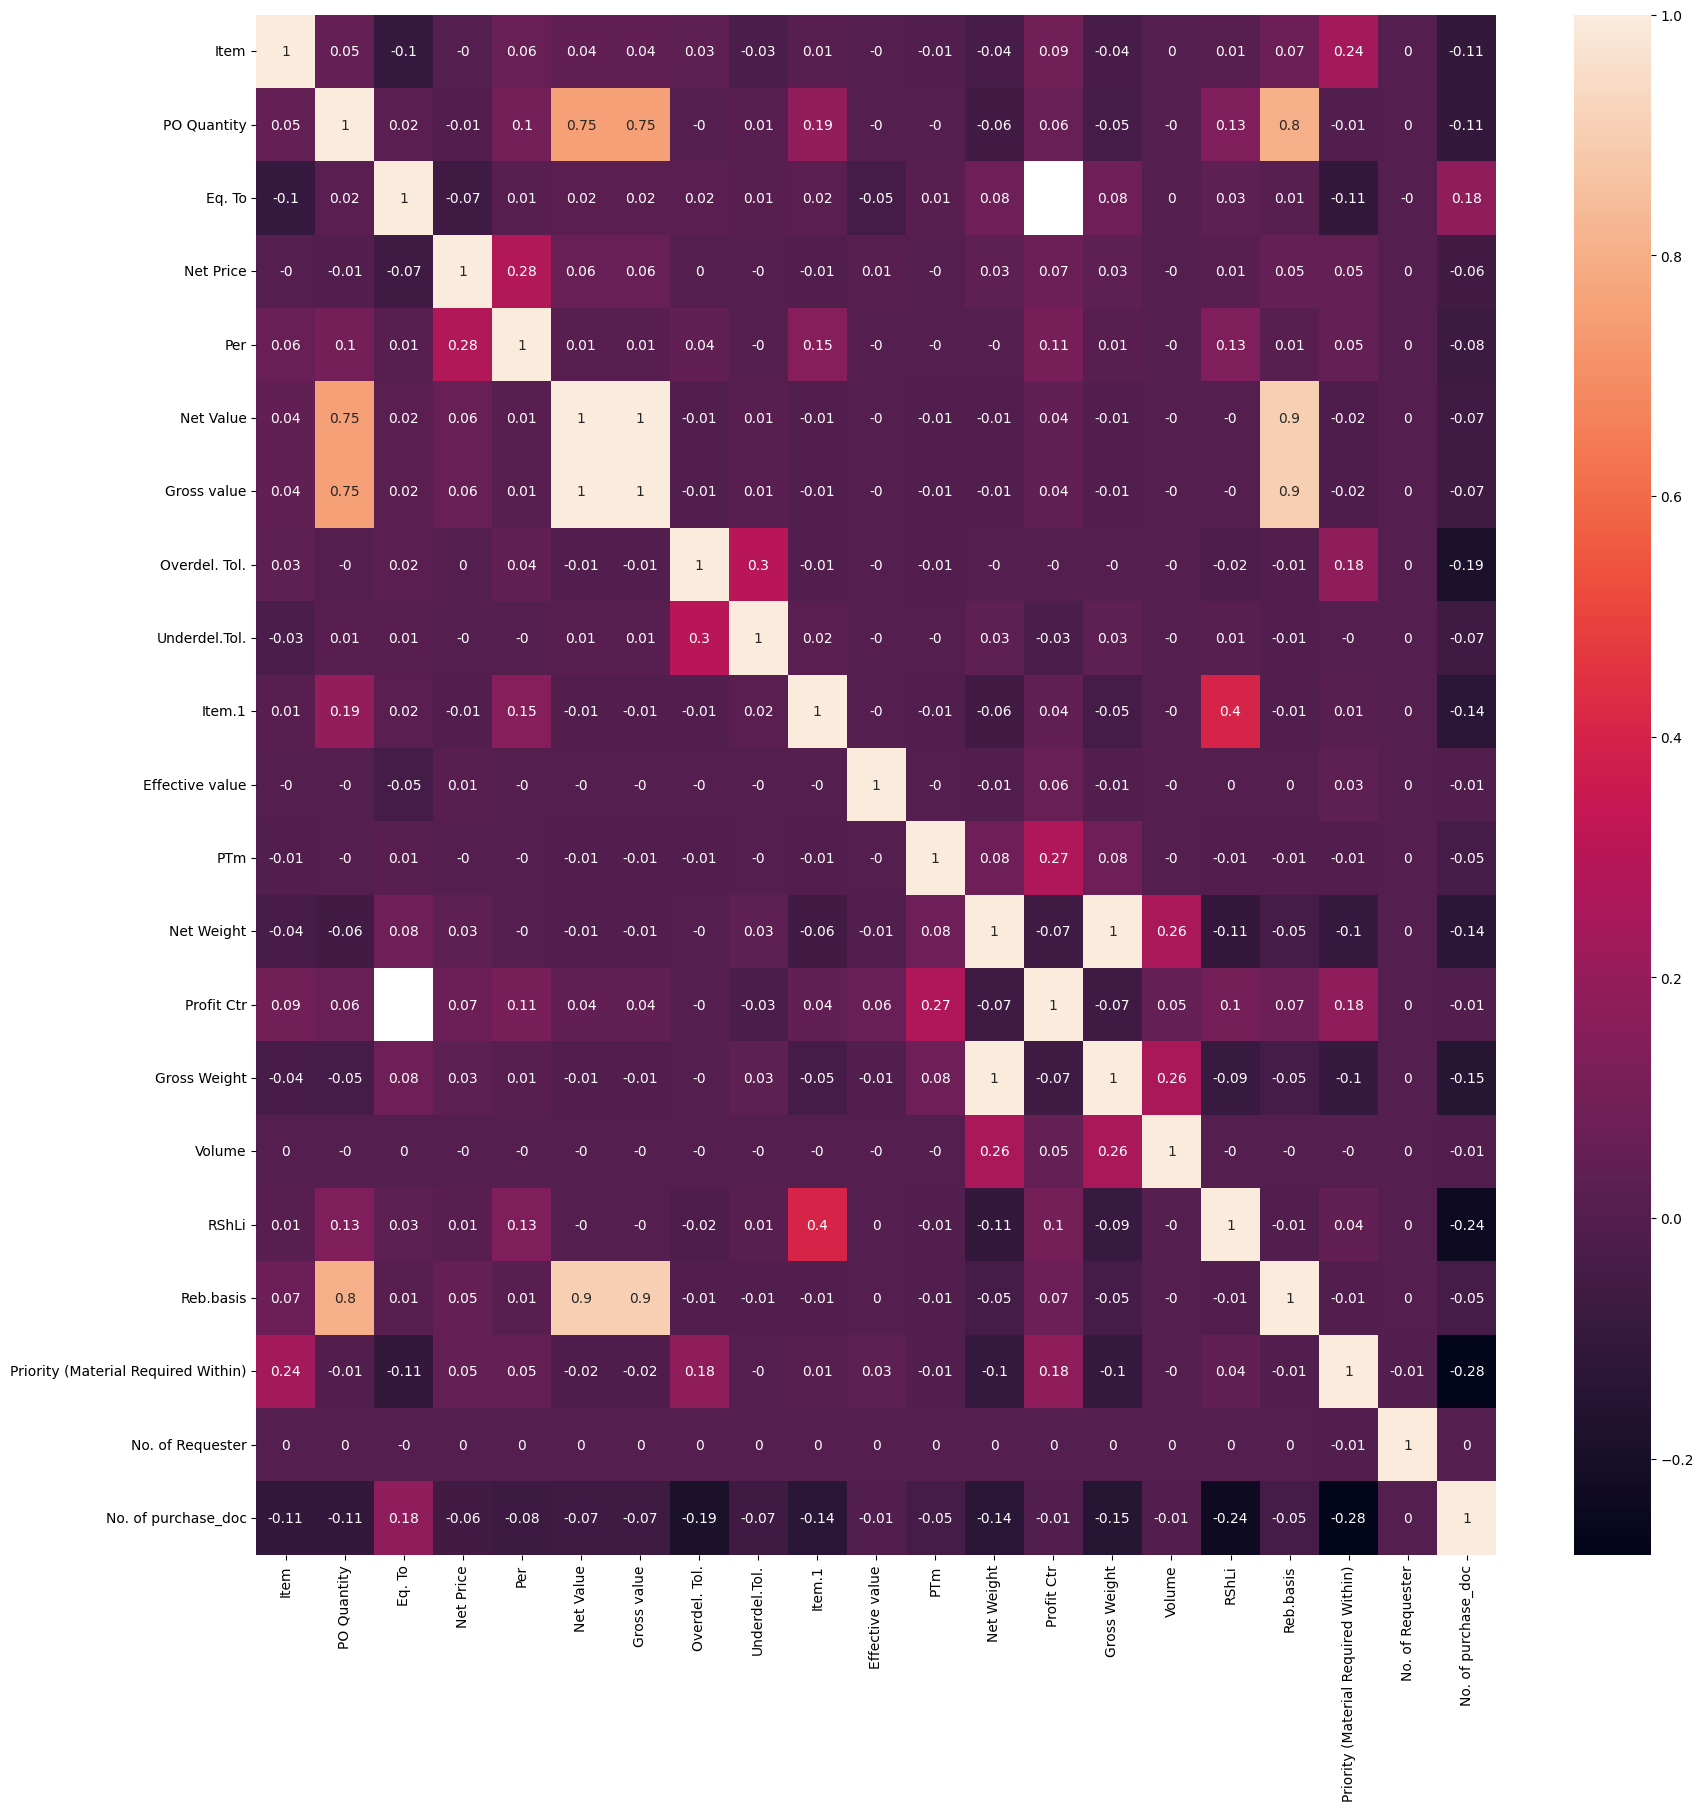

In [27]:
corr_mat = df[all_nc].corr().round(2)
plt.subplots(figsize=(20,20))
ax = sns.heatmap(data=corr_mat, annot=True)
plt.show()

- Reb.basis column is highly correlated to PO Quantity,Net value and Gross value.
- Net value and Gross value correlation value is 1 which means both columns have exactly the same values.
- I will remove Reb.basis and Gross value columns.

### Creating a new column named ''doc_used_count''- i.e the number of times a purchase document is used for repurchasing.

In [28]:
df.loc[df['Purch.Doc.']=='1000004531']

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,Matl Group,PO Quantity,OUn,...,Approved By,Priority,Section,Indenter ID,Input Tax Credit,Spend_Class,No. of Requester,Class of Requester,No. of purchase_doc,Class of Purchase_doc
14376,1000004531,10,8/21/2014,65 nb cs dummy flange ( class - 150 ),961999.0,9000,9110,1206,2.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc
14377,1000004531,20,8/21/2014,50 nb cs dummy flange ( class - 150 ),803931.0,9000,9110,1206,2.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc
14378,1000004531,30,8/21/2014,40 nb cs dummy flange ( class - 150 ),805925.0,9000,9110,1206,4.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc
14379,1000004531,40,2/25/2015,20 nb cs dummy flange ( class - 150 ),803932.0,9000,9110,1206,2.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc
14380,1000004531,50,8/21/2014,65 nb cs sorf flange ( class - 150 ),960316.0,9000,9110,1206,8.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc
14381,1000004531,60,8/21/2014,50 nb cs sorf flange ( class - 150 ),800404.0,9000,9110,1206,20.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc
14382,1000004531,70,8/21/2014,40 nb cs sorf flange ( class - 150 ),800401.0,9000,9110,1206,16.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc
14383,1000004531,80,8/21/2014,20 nb cs sorf flange ( class - 150 ),800405.0,9000,9110,1206,16.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc
14384,1000004531,90,8/21/2014,65 x 40 cs consntric reducer (seamless),800451.0,9000,9110,1206,1.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc
14385,1000004531,100,8/21/2014,65 x 25 cs consntric reducer (seamless),965138.0,9000,9110,1201,1.00,EA,...,54745,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc


- Above we can see that the 'Purch.Doc' having id no '1000004531' is used 18 times

In [29]:
df.sort_values(by=['Purch.Doc.'], inplace=True)

In [30]:
v=df['Purch.Doc.'].unique()

In [31]:
change_count=[]
for pur_doc in v:
    v1=len(df.loc[df['Purch.Doc.']==pur_doc])
    for no_ in range(v1):
        change_count.append(v1)     

In [32]:
df['doc_used_count']=change_count 

In [33]:
df.loc[df['Purch.Doc.']=='1000004531']

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,Matl Group,PO Quantity,OUn,...,Priority,Section,Indenter ID,Input Tax Credit,Spend_Class,No. of Requester,Class of Requester,No. of purchase_doc,Class of Purchase_doc,doc_used_count
14386,1000004531,110,8/21/2014,20 x 50 cs consntric reducer (seamless),800455.0,9000,9110,1206,1.00,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14392,1000004531,200,8/21/2014,40 nb cs elebow ( schedule 40. seamless),802807.0,9000,9110,1206,20.00,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14391,1000004531,190,8/21/2014,50 nb cs elebow ( schedule 40. seamless),802806.0,9000,9110,1206,20.00,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14390,1000004531,180,8/21/2014,65 nb cs elebow ( schedule 40.seamless),809588.0,9000,9110,1206,10.00,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14389,1000004531,170,2/25/2015,15 nb cs pipe( schedule 40. ) (seamless),800446.0,9000,9110,3053,11.70,M,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14388,1000004531,160,2/25/2015,20 nb cs pipe ( schedule 40. ) (seamless,960335.0,9000,9110,3053,34.98,M,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14387,1000004531,120,8/21/2014,25 x 50 cs consntric reducer (seamless),800453.0,9000,9110,1206,1.00,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14385,1000004531,100,8/21/2014,65 x 25 cs consntric reducer (seamless),965138.0,9000,9110,1201,1.00,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14393,1000004531,210,8/21/2014,20 nb cs elebow ( schedule 40. seamless),800399.0,9000,9110,1206,25.00,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14384,1000004531,90,8/21/2014,65 x 40 cs consntric reducer (seamless),800451.0,9000,9110,1206,1.00,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18


- At the end I've added how many times the doc was used-'doc_used_count' column

In [34]:
df.head()

,Purch.Doc.,Item,Changed On,Short Text,Material,CoCd,Plnt,Matl Group,PO Quantity,OUn,...,Priority,Section,Indenter ID,Input Tax Credit,Spend_Class,No. of Requester,Class of Requester,No. of purchase_doc,Class of Purchase_doc,doc_used_count
14386,1000004531,110,8/21/2014,20 x 50 cs consntric reducer (seamless),800455.0,9000,9110,1206,1.0,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14392,1000004531,200,8/21/2014,40 nb cs elebow ( schedule 40. seamless),802807.0,9000,9110,1206,20.0,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14391,1000004531,190,8/21/2014,50 nb cs elebow ( schedule 40. seamless),802806.0,9000,9110,1206,20.0,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14390,1000004531,180,8/21/2014,65 nb cs elebow ( schedule 40.seamless),809588.0,9000,9110,1206,10.0,EA,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18
14389,1000004531,170,2/25/2015,15 nb cs pipe( schedule 40. ) (seamless),800446.0,9000,9110,3053,11.7,M,...,medium,mach. work,54857,0,Major Spend,1.0,Single Requester,1.0,Single Purchase_doc,18


### Creating a new column named 'avg_net_price' by grouping the dataset based on 'Short Text','CoCd'

In [35]:
avg_df=df.groupby(['Short Text','CoCd',])['Net Price'].agg('mean')

In [36]:
avg_df.head()

Short Text                                CoCd
"1/4 ratchet 7-13mm nuts                  7860    1271.00
"ind. air heating ele. 2000 w ,240 v"     7860    2470.00
'biquiti - airgrid m5 hi-power 27dbi      9000    7200.00
0028330 frt.bonnet hings kabja lh bolero  7860     481.73
0028334 frt.bonnet hings kabja rh bolero  7860    2304.80
Name: Net Price, dtype: float64

In [37]:
avg_df.iloc[4]

2304.8

In [38]:
avg_list=list(avg_df.index)

In [39]:
avg_net_price=[]
for l in range(len(avg_df)):
    avg_net_price.append(avg_df.iloc[l])

In [40]:
avg_net_price[:5]

[1271.0, 2470.0, 7200.0, 481.73, 2304.8]

In [41]:
tuple_=[]
st=list(df['Short Text']) 
co=list(df['CoCd']) 
#pl=list(df['Plnt'])
for r in range(len(df)):
    tuple_.append((st[r],co[r]))

In [42]:
tuple_[:5]

[('20 x 50 cs consntric reducer (seamless)', '9000'),
 ('40 nb cs elebow ( schedule 40. seamless)', '9000'),
 ('50 nb cs elebow ( schedule 40. seamless)', '9000'),
 ('65 nb cs elebow ( schedule 40.seamless)', '9000'),
 ('15 nb cs pipe( schedule 40. ) (seamless)', '9000')]

### Creating the target column 'spend_efficiency' 

In [43]:
net_price_avg_df=[]
spend_efficiency=[]
k=0
for t in tuple_:
    if t in avg_list:
        w=avg_list.index(t)
        net_price_avg_df.append(avg_net_price[w])
        if df['Net Price'].iloc[k]>avg_net_price[w]: # if net price greater than avg_net_price,spend_efficiency is 1
            spend_efficiency.append(1)
        else:                                        # if net price lesser than avg_net_price,spend_efficiency is 0
            spend_efficiency.append(0) 
        k+=1

In [44]:
df['Net Price'].iloc[0]

55.0

In [45]:
net_price_avg_df[:5]

[55.0, 38.0, 62.0, 120.0, 105.0]

In [46]:
df['avg_net_price']=net_price_avg_df
df['spend_efficiency']=spend_efficiency

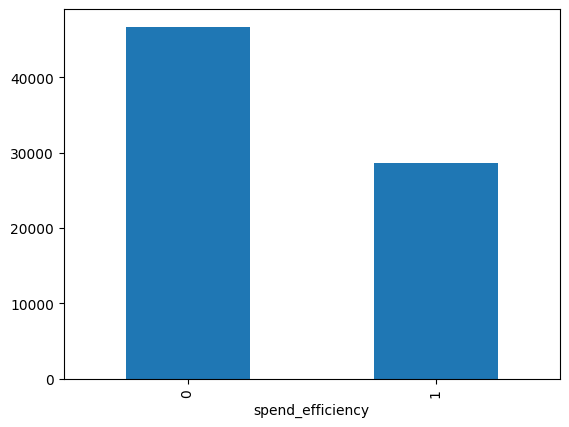

In [47]:
df['spend_efficiency'].value_counts().plot(kind='bar')
plt.show()

In [48]:
df['spend_efficiency'].value_counts()

spend_efficiency
0    46696
1    28653
Name: count, dtype: int64

- Clearly an imbalanced binary class column

In [49]:
df.columns

Index(['Purch.Doc.', 'Item', 'Changed On', 'Short Text', 'Material', 'CoCd',
       'Plnt', 'Matl Group', 'PO Quantity', 'OUn', 'OPU', 'Eq. To',
       'Net Price', 'Per', 'Net Value', 'Gross value', 'Overdel. Tol.',
       'Underdel.Tol.', 'Item.1', 'BUn', 'Non-deductible', 'Price Date',
       'Effective value', 'PTm', 'Net Weight', 'Profit Ctr', 'Gross Weight',
       'Volume', 'RShLi', 'MTyp', 'NCM Code', 'Reb.basis',
       'Priority (Material Required Within)', 'Ordered By', 'Approved By',
       'Priority', 'Section', 'Indenter ID', 'Input Tax Credit', 'Spend_Class',
       'No. of Requester', 'Class of Requester', 'No. of purchase_doc',
       'Class of Purchase_doc', 'doc_used_count', 'avg_net_price',
       'spend_efficiency'],
      dtype='object')

### Dropping null rows containing only 2% or less missing values

In [50]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()}).iloc[:25,:]

,dtypes,null_count,unique_values,percent_of_null_values
Purch.Doc.,object,0,1139,0.000000
Item,int64,0,42,0.000000
Changed On,object,0,210,0.000000
Short Text,object,0,7310,0.000000
Material,object,0,6326,0.000000
CoCd,object,0,5,0.000000
Plnt,object,0,116,0.000000
Matl Group,object,0,151,0.000000
PO Quantity,float64,0,14990,0.000000
OUn,object,0,31,0.000000


In [51]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()}).iloc[25:,:]

,dtypes,null_count,unique_values,percent_of_null_values
Profit Ctr,float64,1604,115,0.021288
Gross Weight,float64,0,17,0.000000
Volume,float64,0,6,0.000000
RShLi,float64,0,22,0.000000
MTyp,object,0,16,0.000000
NCM Code,object,0,1158,0.000000
Reb.basis,float64,0,19382,0.000000
Priority (Material Required Within),float64,0,62,0.000000
Ordered By,object,0,124,0.000000
Approved By,object,0,64,0.000000


In [52]:
df.shape

(75349, 47)

In [53]:
df.dropna(inplace=True)

In [54]:
df.shape

(73504, 47)

In [55]:
df_copy=df # To use later

### Sample checking my analysis

In [56]:
df_sample=df.loc[df['Short Text']=='ib ross broiler finisher feed']

In [100]:
# Trying to find from how many companies are they buying this material-'ib ross broiler finisher feed'
df_sample['CoCd'].unique()

array(['7860', '4500'], dtype=object)

In [99]:
df_sample[['CoCd','Short Text','avg_net_price','Net Price','spend_efficiency']]

,CoCd,Short Text,avg_net_price,Net Price,spend_efficiency
34625,7860,ib ross broiler finisher feed,29.058508,30.74,1
34628,7860,ib ross broiler finisher feed,29.058508,30.74,1
34631,7860,ib ross broiler finisher feed,29.058508,30.74,1
54968,7860,ib ross broiler finisher feed,29.058508,29.63,1
54962,7860,ib ross broiler finisher feed,29.058508,29.13,1
...,...,...,...,...,...
21275,7860,ib ross broiler finisher feed,29.058508,26.30,0
21294,7860,ib ross broiler finisher feed,29.058508,30.35,1
21286,7860,ib ross broiler finisher feed,29.058508,30.35,1
21285,7860,ib ross broiler finisher feed,29.058508,30.35,1


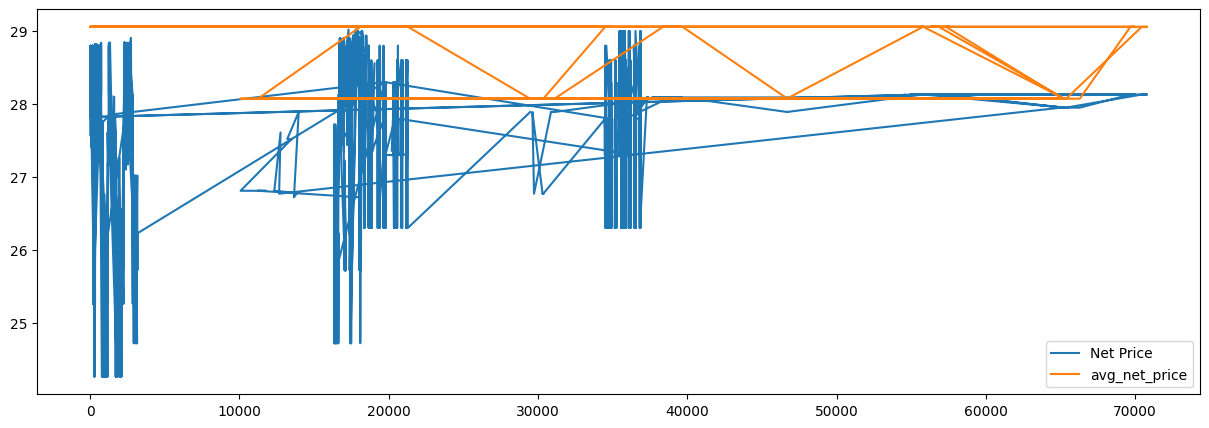

In [58]:
df_sample.loc[df_sample['spend_efficiency']==0][['Net Price','avg_net_price']].plot(kind='line',figsize=(15,5))
plt.show()

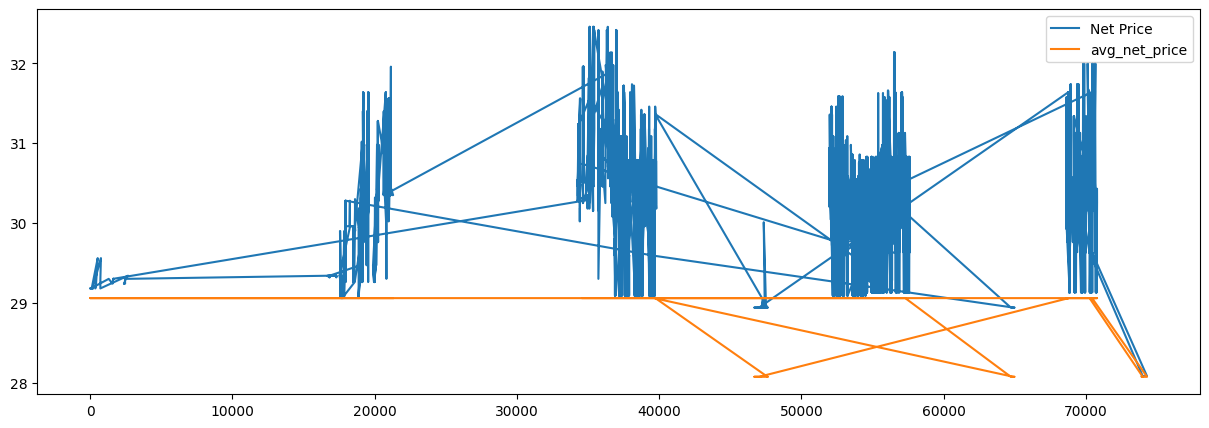

In [59]:
df_sample.loc[df_sample['spend_efficiency']==1][['Net Price','avg_net_price']].plot(kind='line',figsize=(15,5))
plt.show()

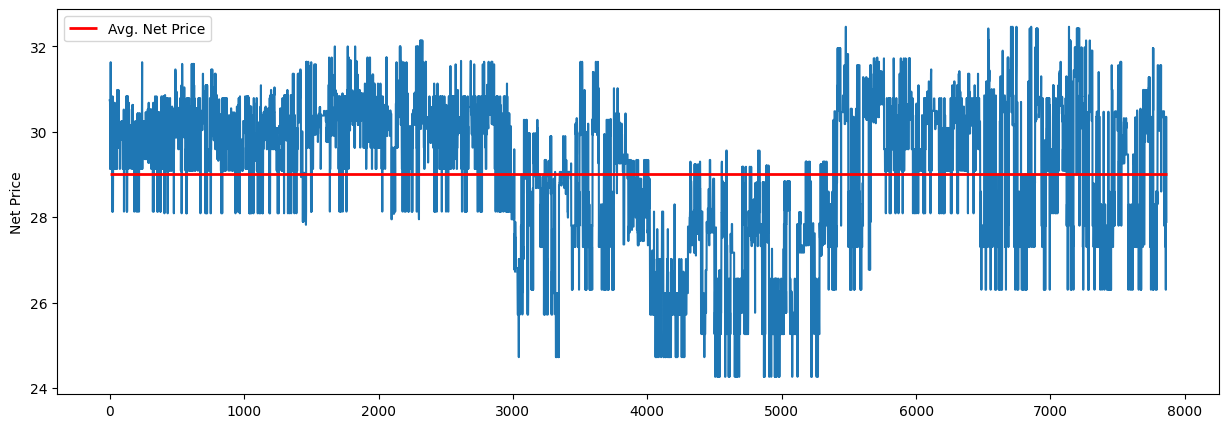

In [60]:
#x = list(df_llb['Changed On'])
x=[i for i in range(len(df_sample))]
y = np.array(list(df_sample['Net Price']))


fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x, y)
ax.hlines(y=round(df_sample['Net Price'].mean()), xmin=0, xmax=len(df_sample), linewidth=2, color='r',label='Avg. Net Price')
ax.legend()
#plt.xlabel("")  # add X-axis label
plt.ylabel("Net Price")  # add Y-axis label
#plt.title("Any suitable title")  # add title

plt.show()

- 'Net Price' above the red line is **inefficiently spend**.
- 'Net Price' below or equal to the red line is **efficiently spend**.

### Balancing the target column

In [61]:
from imblearn.over_sampling import SMOTENC

In [62]:
X=df[['Purch.Doc.', 'Short Text', 'Material', 'CoCd', 'Plnt', 'Matl Group', 'OUn', 'OPU', 'BUn', 'Non-deductible',
      'MTyp', 'NCM Code', 'Ordered By','Approved By', 'Section', 'Indenter ID',  'Spend_Class', 'Class of Requester', 
      'Input Tax Credit','Class of Purchase_doc','Priority',
      'Item',
      'PO Quantity', 'Eq. To', 'Net Price', 'Per', 'Net Value', 'Gross value', 'Overdel. Tol.', 'Underdel.Tol.', 'Item.1', 'Effective value',
      'PTm', 'Net Weight', 'Profit Ctr', 'Gross Weight', 'Volume', 'RShLi', 'Priority (Material Required Within)',
      'No. of Requester', 'No. of purchase_doc', 'doc_used_count', 'avg_net_price']]
y=df[ 'spend_efficiency']

In [63]:
smnc = SMOTENC(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    #n_jobs=4,
    categorical_features=[h for h in range(22)] # indeces of the columns of categorical variables
)  

X_res, y_res = smnc.fit_resample(X, y)

In [64]:
# size of original data

X.shape, y.shape

((73504, 43), (73504,))

In [65]:
# size of undersampled data

X_res.shape, y_res.shape

((90338, 43), (90338,))

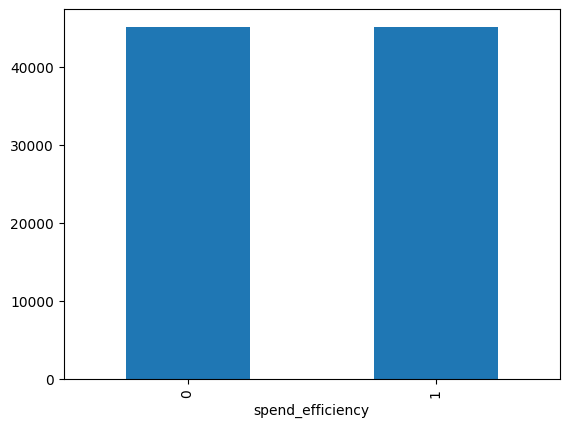

In [66]:
y_res.value_counts().plot(kind='bar')
plt.show()

In [67]:
X_res.head()

,Purch.Doc.,Short Text,Material,CoCd,Plnt,Matl Group,OUn,OPU,BUn,Non-deductible,...,Net Weight,Profit Ctr,Gross Weight,Volume,RShLi,Priority (Material Required Within),No. of Requester,No. of purchase_doc,doc_used_count,avg_net_price
0,1000004531,20 x 50 cs consntric reducer (seamless),800455.0,9000,9110,1206,EA,EA,EA,2.75,...,0.0,9110.0,0.0,0.0,0.0,6.0,1.0,1.0,18,55.0
1,1000004531,40 nb cs elebow ( schedule 40. seamless),802807.0,9000,9110,1206,EA,EA,EA,38.00,...,0.0,9110.0,0.0,0.0,0.0,6.0,1.0,1.0,18,38.0
2,1000004531,50 nb cs elebow ( schedule 40. seamless),802806.0,9000,9110,1206,EA,EA,EA,62.00,...,0.0,9110.0,0.0,0.0,0.0,6.0,1.0,1.0,18,62.0
3,1000004531,65 nb cs elebow ( schedule 40.seamless),809588.0,9000,9110,1206,EA,EA,EA,60.00,...,0.0,9110.0,0.0,0.0,0.0,6.0,1.0,1.0,18,120.0
4,1000004531,15 nb cs pipe( schedule 40. ) (seamless),800446.0,9000,9110,3053,M,M,M,61.43,...,0.0,9110.0,0.0,0.0,0.0,6.0,1.0,1.0,18,105.0


In [68]:
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder

In [69]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X_res,  # predictors
    y_res,  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=120,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((63236, 43), (27102, 43))

In [70]:
ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method="ordered",
    variables=['Purch.Doc.', 'Short Text', 'Material', 'CoCd', 'Plnt', 'Matl Group', 'OUn', 'OPU', 'BUn', 'Non-deductible',
      'MTyp', 'NCM Code', 'Ordered By','Approved By', 'Section', 'Indenter ID',  'Spend_Class', 'Class of Requester', 
      'Input Tax Credit','Class of Purchase_doc','Priority'],
)

In [71]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['Purch.Doc.', 'Short Text', 'Material', 'CoCd',
                          'Plnt', 'Matl Group', 'OUn', 'OPU', 'BUn',
                          'Non-deductible', 'MTyp', 'NCM Code', 'Ordered By',
                          'Approved By', 'Section', 'Indenter ID',
                          'Spend_Class', 'Class of Requester',
                          'Input Tax Credit', 'Class of Purchase_doc',
                          'Priority'])

In [72]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# let's explore the result
X_train.head()

C:\Users\Kavin\anaconda3\envs\car_dekho_mlproject\lib\site-packages\feature_engine\encoding\base_encoder.py:255: UserWarning: During the encoding, NaN values were introduced in the feature(s) Purch.Doc., Short Text, Material, Plnt, Matl Group, OUn, OPU, BUn, Non-deductible, NCM Code, Ordered By, Approved By, Section, Indenter ID.
  warnings.warn(


,Purch.Doc.,Short Text,Material,CoCd,Plnt,Matl Group,OUn,OPU,BUn,Non-deductible,...,Net Weight,Profit Ctr,Gross Weight,Volume,RShLi,Priority (Material Required Within),No. of Requester,No. of purchase_doc,doc_used_count,avg_net_price
1037,541,3420,1021,0,20,105,9,9,9,2006,...,0.0,4.504510e+09,0.0,0.0,0.0,6.0,1.0,1.0,6,1101.690000
5920,185,4543,4493,2,32,118,23,23,23,2006,...,0.0,9.110000e+03,0.0,0.0,0.0,5.0,1.0,7.0,4,147.142857
54771,810,4690,4682,2,55,131,24,24,24,2006,...,0.0,9.130000e+03,0.0,0.0,0.0,0.0,1.0,1417.0,67866,3252.988709
53172,810,2035,1790,2,32,88,23,23,23,2006,...,0.0,9.110000e+03,0.0,0.0,0.0,2.0,1.0,1.0,67866,312.000000
18591,810,4781,4775,2,26,123,23,23,23,2006,...,0.0,9.401000e+03,0.0,0.0,0.0,0.0,1.0,1326.0,67866,17.122127


In [73]:
X_test.isnull().sum()

Purch.Doc.                                5
Short Text                             1405
Material                               1403
CoCd                                      0
Plnt                                      4
Matl Group                                3
OUn                                       1
OPU                                       1
BUn                                       1
Non-deductible                          766
MTyp                                      0
NCM Code                                147
Ordered By                                5
Approved By                               5
Section                                  99
Indenter ID                               3
Spend_Class                               0
Class of Requester                        0
Input Tax Credit                          0
Class of Purchase_doc                     0
Priority                                  0
Item                                      0
PO Quantity                     

In [74]:
# Im creating a new column in the X_test called 'y_test' which contains all values from y_test
X_test['y_test']=y_test

In [75]:
# Dropping all NaN rows from X_test

X_test.dropna(inplace=True)

In [76]:
X_test.isnull().sum()

Purch.Doc.                             0
Short Text                             0
Material                               0
CoCd                                   0
Plnt                                   0
Matl Group                             0
OUn                                    0
OPU                                    0
BUn                                    0
Non-deductible                         0
MTyp                                   0
NCM Code                               0
Ordered By                             0
Approved By                            0
Section                                0
Indenter ID                            0
Spend_Class                            0
Class of Requester                     0
Input Tax Credit                       0
Class of Purchase_doc                  0
Priority                               0
Item                                   0
PO Quantity                            0
Eq. To                                 0
Net Price       

In [77]:
#Creating a new y_test with no NaN values
y_test=X_test['y_test']

In [78]:
#Creating a new X_test with no NaN values
X_test=X_test[['Purch.Doc.', 'Short Text', 'Material', 'CoCd', 'Plnt', 'Matl Group', 'OUn', 'OPU', 'BUn', 'Non-deductible',
      'MTyp', 'NCM Code', 'Ordered By','Approved By', 'Section', 'Indenter ID',  'Spend_Class', 'Class of Requester', 
      'Input Tax Credit','Class of Purchase_doc','Priority',
      'Item',
      'PO Quantity', 'Eq. To', 'Net Price', 'Per', 'Net Value', 'Gross value', 'Overdel. Tol.', 'Underdel.Tol.', 'Item.1', 'Effective value',
      'PTm', 'Net Weight', 'Profit Ctr', 'Gross Weight', 'Volume', 'RShLi', 'Priority (Material Required Within)',
      'No. of Requester', 'No. of purchase_doc', 'doc_used_count', 'avg_net_price']]

In [79]:
X_train_optimize=X_train[['Purch.Doc.', 'Short Text', 'Material', 'CoCd', 'Plnt', 'Matl Group', 'OUn', 'OPU', 'BUn', 'Non-deductible',
      'MTyp', 'NCM Code', 'Ordered By','Approved By', 'Section', 'Indenter ID',  'Spend_Class', 'Class of Requester', 
      'Input Tax Credit','Class of Purchase_doc','Priority',
      'Item',
      'PO Quantity', 'Eq. To', 'Net Price', 'Per', 'Net Value', 'Gross value', 'Overdel. Tol.', 'Underdel.Tol.', 'Item.1', 'Effective value',
      'PTm', 'Net Weight', 'Profit Ctr', 'Gross Weight', 'Volume', 'RShLi', 'Priority (Material Required Within)',
      'No. of Requester', 'No. of purchase_doc', 'doc_used_count', 'avg_net_price']]

In [80]:
X_test_optimize=X_test[['Purch.Doc.', 'Short Text', 'Material', 'CoCd', 'Plnt', 'Matl Group', 'OUn', 'OPU', 'BUn', 'Non-deductible',
      'MTyp', 'NCM Code', 'Ordered By','Approved By', 'Section', 'Indenter ID',  'Spend_Class', 'Class of Requester', 
      'Input Tax Credit','Class of Purchase_doc','Priority',
      'Item',
      'PO Quantity', 'Eq. To', 'Net Price', 'Per', 'Net Value', 'Gross value', 'Overdel. Tol.', 'Underdel.Tol.', 'Item.1', 'Effective value',
      'PTm', 'Net Weight', 'Profit Ctr', 'Gross Weight', 'Volume', 'RShLi', 'Priority (Material Required Within)',
      'No. of Requester', 'No. of purchase_doc', 'doc_used_count', 'avg_net_price']]

### Running the ML classification models

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from xgboost import XGBClassifier
#from sklearn.feature_selection import RFE


#Evaluation metrics
from sklearn.metrics import (accuracy_score,roc_auc_score,confusion_matrix, ConfusionMatrixDisplay,
classification_report)

In [82]:
# standardisation: with the StandardScaler from sklearn
# set up the scaler
scaler= StandardScaler()

# fit the scaler to the train set, to learn the parameters
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [83]:
def classifier(model_name,ml_model,X_train_set,y_train_set,X_test_scaled):
    model = ml_model
    model.fit(X_train_set,y_train_set)
    y_pred =model.predict(X_test_scaled)
    

    print('Train set')
    pred = model.predict_proba(X_train_set)
    #print(pred[:5])
    print(
        f'{model_name}',"roc-auc: {}".format(roc_auc_score(y_train_set, pred[:, 1])))
    #plot_confusion_matrix(model,X_train_set,y_train_set)
    print('Test set')
    pred = model.predict_proba(X_test_scaled)
    print(
        f'{model_name}',"roc-auc: {}".format(roc_auc_score(y_test, pred[:, 1])))
    print('accuracy_score:',accuracy_score(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

In [84]:
classifier('logistic_regression',LogisticRegression(max_iter=1000,random_state=23),X_train,y_train,X_test)

Train set
logistic_regression roc-auc: 0.9000822442522391
Test set
logistic_regression roc-auc: 0.8689979055617943
accuracy_score: 0.8000318864841165


              precision    recall  f1-score   support

           0       0.91      0.64      0.75     11717
           1       0.75      0.94      0.83     13372

    accuracy                           0.80     25089
   macro avg       0.83      0.79      0.79     25089
weighted avg       0.82      0.80      0.79     25089

[[ 7457  4260]
 [  757 12615]]


In [85]:
classifier('RandomForestClassifier',RandomForestClassifier(n_estimators=100,max_leaf_nodes= None, 
                                                       min_samples_leaf= 3, max_depth=10,
                                                       min_samples_split= 4, ),
           
           X_train,y_train,X_test)

Train set
RandomForestClassifier roc-auc: 0.9954301681064779
Test set
RandomForestClassifier roc-auc: 0.9816516877448674
accuracy_score: 0.8874805691737415


              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11717
           1       0.84      0.98      0.90     13372

    accuracy                           0.89     25089
   macro avg       0.90      0.88      0.88     25089
weighted avg       0.90      0.89      0.89     25089

[[ 9203  2514]
 [  309 13063]]


In [86]:
classifier('ExtraTreesClassifier',ExtraTreesClassifier(n_estimators=100,max_leaf_nodes= None, 
                                                       min_samples_leaf= 3, max_depth=10,
                                                       min_samples_split= 4, ),
           
           X_train,y_train,X_test)

Train set
ExtraTreesClassifier roc-auc: 0.8875823805934382
Test set
ExtraTreesClassifier roc-auc: 0.8664054865197491
accuracy_score: 0.782454462114871


              precision    recall  f1-score   support

           0       0.94      0.57      0.71     11717
           1       0.72      0.97      0.83     13372

    accuracy                           0.78     25089
   macro avg       0.83      0.77      0.77     25089
weighted avg       0.82      0.78      0.77     25089

[[ 6684  5033]
 [  425 12947]]


In [87]:
classifier('XGBClassifier',XGBClassifier(n_estimators=100,learning_rate=0.01,booster='gbtree',
                         gamma=0.5), X_train,y_train,X_test)

Train set
XGBClassifier roc-auc: 0.9905493477397026
Test set
XGBClassifier roc-auc: 0.9806347246309931
accuracy_score: 0.921559249073299


              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11717
           1       0.89      0.98      0.93     13372

    accuracy                           0.92     25089
   macro avg       0.93      0.92      0.92     25089
weighted avg       0.93      0.92      0.92     25089

[[10078  1639]
 [  329 13043]]


- XGBClassifier has performed well to classify spend efficiency

### Selecting the important features

In [88]:
model =XGBClassifier(n_estimators=100,learning_rate=0.01,booster='gbtree',
                         gamma=0.5)
model_name='XGBClassifier'                                                       
model.fit(X_train,y_train)
y_pred =model.predict(X_test)


print('Train set')
pred = model.predict_proba(X_train)
#print(pred[:5])
print(
    f'{model_name}',"roc-auc: {}".format(roc_auc_score(y_train, pred[:, 1])))
#plot_confusion_matrix(model,X_train_set,y_train_set)
print('Test set')
pred = model.predict_proba(X_test)
print(
    f'{model_name}',"roc-auc: {}".format(roc_auc_score(y_test, pred[:, 1])),'\n')
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Train set
XGBClassifier roc-auc: 0.9905493477397026
Test set
XGBClassifier roc-auc: 0.9806347246309931 

accuracy_score: 0.921559249073299


              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11717
           1       0.89      0.98      0.93     13372

    accuracy                           0.92     25089
   macro avg       0.93      0.92      0.92     25089
weighted avg       0.93      0.92      0.92     25089

[[10078  1639]
 [  329 13043]]


In [89]:
all_selected_features=['Purch.Doc.', 'Short Text', 'Material', 'CoCd', 'Plnt', 'Matl Group', 'OUn', 'OPU', 'BUn', 'Non-deductible',
      'MTyp', 'NCM Code', 'Ordered By','Approved By', 'Section', 'Indenter ID',  'Spend_Class', 'Class of Requester', 
      'Input Tax Credit','Class of Purchase_doc','Priority',
      'Item',
      'PO Quantity', 'Eq. To', 'Net Price', 'Per', 'Net Value', 'Gross value', 'Overdel. Tol.', 'Underdel.Tol.', 'Item.1', 'Effective value',
      'PTm', 'Net Weight', 'Profit Ctr', 'Gross Weight', 'Volume', 'RShLi', 'Priority (Material Required Within)',
      'No. of Requester', 'No. of purchase_doc', 'doc_used_count', 'avg_net_price']

In [90]:
feature_importances = pd.Series(model.feature_importances_, index=all_selected_features)

In [91]:
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

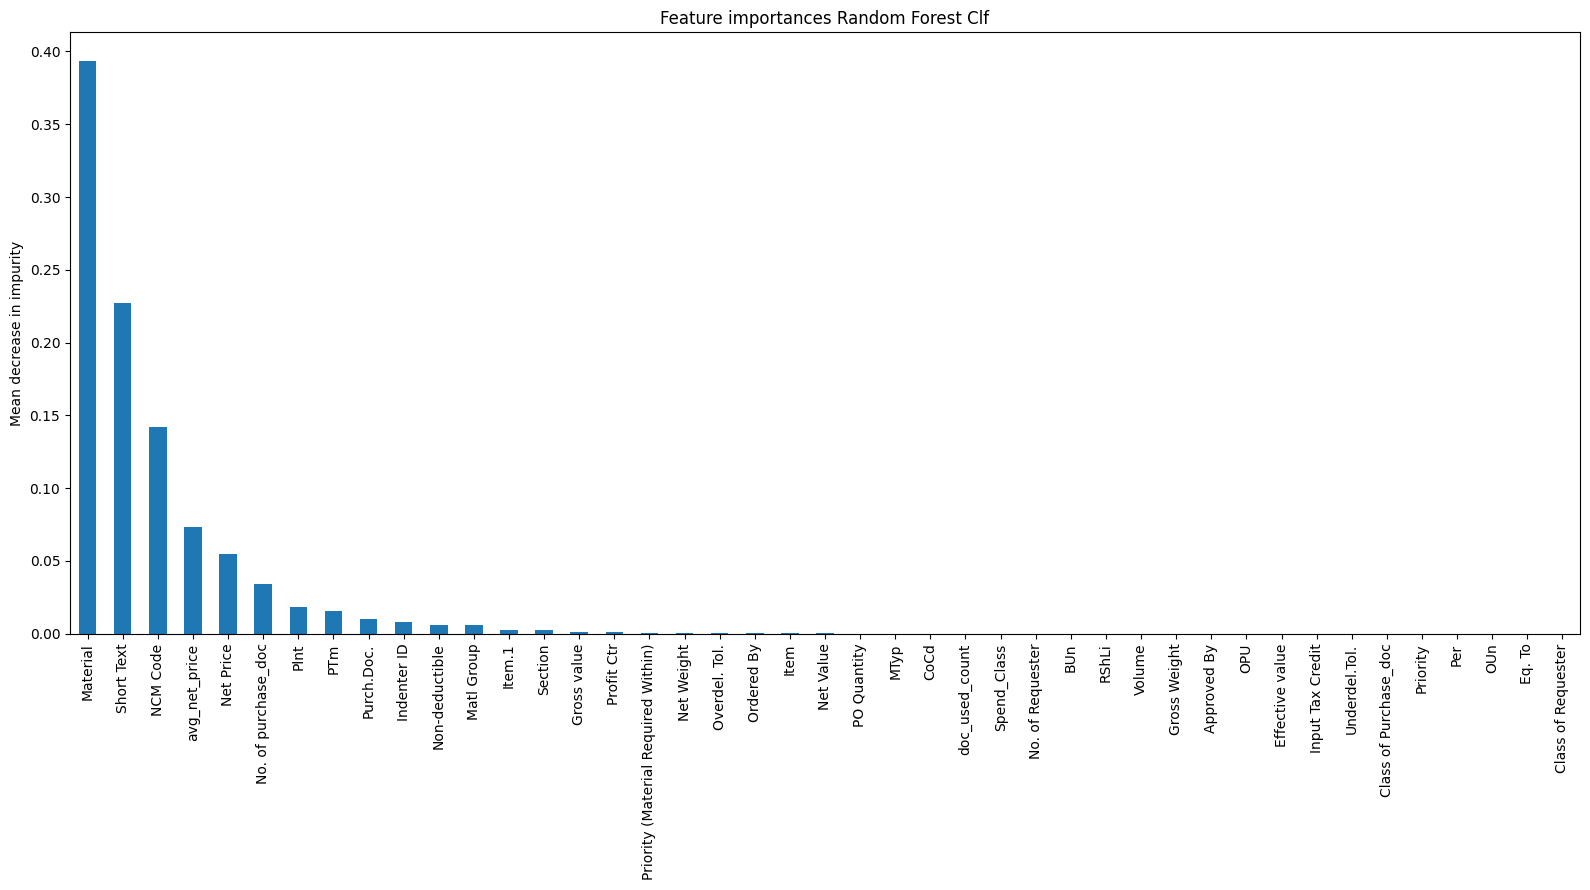

In [92]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
feature_importances.sort_values(ascending=False).plot.bar( ax=ax)
ax.set_title("Feature importances Random Forest Clf")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [93]:
clf= GradientBoostingClassifier(n_estimators=100,random_state=1200)
clf.fit(X_train,y_train)

feature_importances = pd.Series(clf.feature_importances_, index=all_selected_features)

In [94]:
feature_importances.sort_values(ascending=False)[:10]

avg_net_price          0.271675
Material               0.221859
Net Price              0.177271
Short Text             0.140915
NCM Code               0.131958
Non-deductible         0.020139
Purch.Doc.             0.014545
No. of purchase_doc    0.011829
BUn                    0.003200
Plnt                   0.003072
dtype: float64

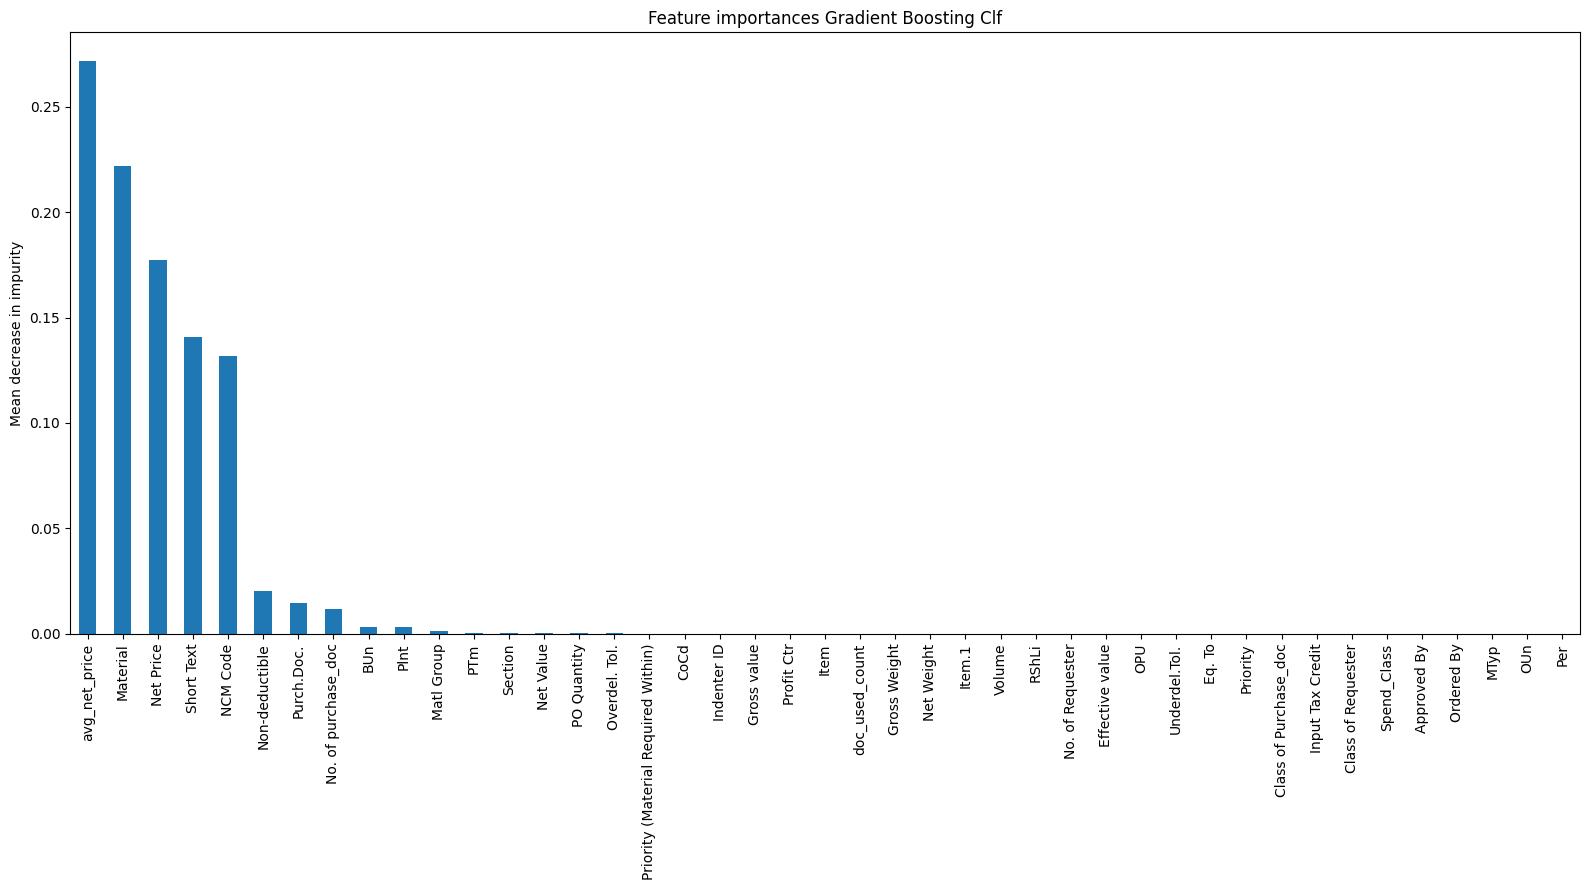

In [95]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
feature_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Feature importances Gradient Boosting Clf")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

- 'Purch.Doc.', 'Short Text', 'Material','Item','Net Price', 'Net Value', 'No. of purchase_doc','doc_used_count' and 'avg_net_price' are the important features to determine the spend efficiency in procuring materials for this dataset.

### Running the ML model with selected features

In [96]:
op_f=['avg_net_price' ,'NCM Code','Material','Net Price', 'Short Text','Non-deductible','Purch.Doc.']

In [97]:
classifier('XGBClassifier',XGBClassifier(n_estimators=100,learning_rate=0.01,booster='gbtree',
                         gamma=0.5), X_train_optimize[op_f],y_train,X_test_optimize[op_f])

Train set
XGBClassifier roc-auc: 0.9890518447302334
Test set
XGBClassifier roc-auc: 0.9784306487545256
accuracy_score: 0.9205229383395114


              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11717
           1       0.89      0.98      0.93     13372

    accuracy                           0.92     25089
   macro avg       0.93      0.92      0.92     25089
weighted avg       0.93      0.92      0.92     25089

[[10042  1675]
 [  319 13053]]


## Results

- The most important features to optimize when procuring materials are -'avg_net_price' ,'NCM Code','Material','Net Price', 'Short Text','Non-deductible','Purch.Doc.'
#### Strategies to follow
- Determine the net price of the material that needs to be purchased,inquiring various suppliers and find the average net price, confirm the order to the supplier who quotes the net price below or equal to the average net price.
- Increase the count of suppliers by finding new guys in the market,purchasing from the same supplier may cause the net price to increase over time.
- Purchase materials in bulk,monitoring when that particular material's cost goes lower in a given year.
- Use the '**NCM Code**' to find the **cost** of material in the market and if it is **relatively lower** than the **'net price'** quoted by the supplier,try to find and purchase from a new supplier.
- Finally create a purchase document which is optimized considering the above said strategies to make an **'effective spend'**

## Hope the results are good!!!